In [19]:
import os 
import numpy as np 
import math 
import cv2 
import matplotlib.pyplot as plt
import json
import random

In [2]:
# wind 
test_img = r'E:\GitHub\AutoDoc\TestImages\IMG_3296.JPG'
test_json = r'E:\GitHub\AutoDoc\TestImages\IMG_3296.JPG.json'

In [6]:
test_img = "/Users/dimka777/Documents/GitHub/AutoDoc/TestImages/IMG_3296.JPG"
test_json = "/Users/dimka777/Documents/GitHub/AutoDoc/TestImages/IMG_3296.JPG.json"

In [3]:
img_test = cv2.imread(test_img)
img_test = cv2.resize(img_test, (512,512))

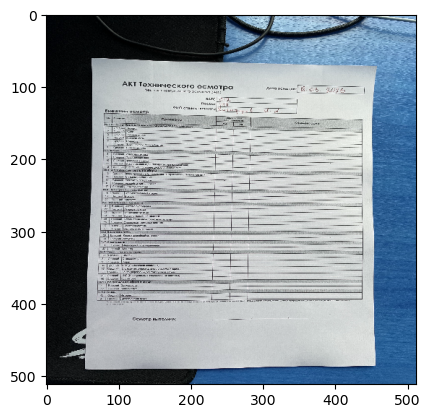

In [4]:
plt.imshow(img_test)

In [5]:
image_size = (512,512)

In [6]:
def get_point_in_json( path_json):
        point = []
        img = cv2.imread(path_json[:-5],cv2.IMREAD_GRAYSCALE)
        h,w = img.shape
        with open (path_json, 'r') as file:
            data = json.load(file)
            point = __get_list_from_dict(data, (h,w))
        return point
def __get_list_from_dict(data: dict, size_img):
        result = []
        keys = data.keys()
        dx = size_img[0]/image_size[0]
        dy = size_img[1]/image_size[1]
        for key in keys:
            result.append(int(data[key][0]/dy))
            result.append(int(data[key][1]/dx))
            
        return result         

In [7]:
points_test = get_point_in_json(test_json)

In [8]:
points_test

[62, 61, 457, 72, 456, 486, 54, 490]

In [9]:
def draw(im, points):
    img = im.copy()
    cv2.circle(img, (points[0],points[1]),2,(255,0,0),-1)
    cv2.circle(img, (points[2],points[3]),2,(255,0,0),-1)
    cv2.circle(img, (points[4],points[5]),2,(255,0,0),-1)
    cv2.circle(img, (points[6],points[7]),2,(255,0,0),-1)
    return img 

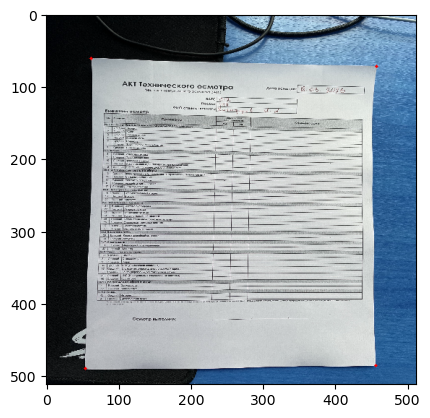

In [10]:
plt.imshow(draw(img_test, points_test))

In [165]:
def rotate_point(center_rotate, rotation_points, angle):
        """
        Поворот точки вокруг точки вращения на заданный угол
        :param center_rotate:
        :param rotation_point:
        :param angle:
        :return:
        """
        angle = math.radians(-angle)
        x_center, y_center = center_rotate
       
        new_points = []
        dx = 600/64
        dy = 600/64

        for i in range(0, len(rotation_points),2):
             
            x_rotation, y_rotation = rotation_points[i]+45,rotation_points[i+1]+45

            new_x = x_center + math.cos(angle) * (x_rotation - x_center) - math.sin(angle) * (y_rotation - y_center)
            new_y = y_center + math.sin(angle) * (x_rotation - x_center) + math.cos(angle) * (y_rotation - y_center)
            new_points.append(int(new_x/dx))
            new_points.append(int(new_y/dy))
        return new_points

    # Поворот изобажения
def rotate_image(point_center, image, angle):
    rotate = cv2.getRotationMatrix2D(point_center, angle, 1)
    image_rotate = cv2.warpAffine(image, rotate, (image.shape[1], image.shape[0]))

    return image_rotate

def aug_data(img_, points):
    img = img_.copy()
    background = np.zeros((600,600,3))
    background[45:600-43, 45:600-43] = img
    
    h,w,_ = background.shape
    center = (int(h/2), int(w/2))
    angle = random.uniform(-25,25)
    new_img = cv2.resize(rotate_image(center, background, angle),(64,64), cv2.INTER_CUBIC)
    new_points = rotate_point(center, points,angle)
    
    return new_img/255, new_points


In [166]:
im, points = aug_data(img_test,points_test)

In [169]:
im.shape

(64, 64, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


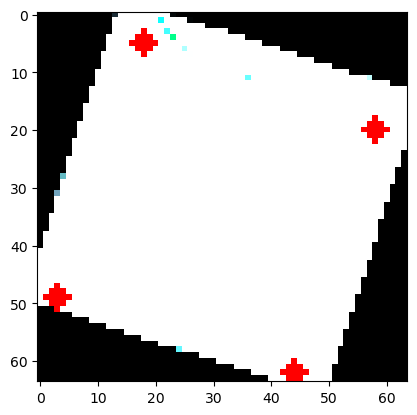

In [168]:
plt.imshow(draw(im, points))

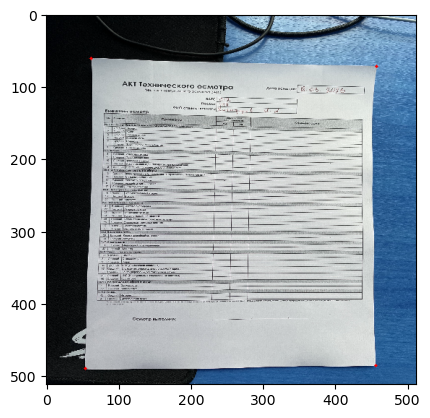

In [25]:
plt.imshow(draw(img_test, points_test))